In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
sns.set(font_scale=1.0)
sns.set_style("white")
sns.set_style("ticks")
palette = sns.color_palette('deep')
plt.style.use('dark_background')
df = pd.read_csv('data/data100m.csv')
df.columns=['Year', 'Time']
N = df.shape[0]

In [2]:
# Data & basis
max_year, min_year = df['Year'].values.max() , df['Year'].values.min()
x = (df['Year'].values.reshape(N,1) - min_year)/(max_year - min_year)
t = df['Time'].values.reshape(N,1)
X_func = lambda u : np.hstack([np.ones((u.shape[0],1)), u ])
X = X_func(x)

# For prediction / plotting
xgrid = np.linspace(0, 1, 100).reshape(100,1)
Xg = X_func(xgrid)
xi = xgrid*(max_year - min_year) + min_year
xi = xi.flatten()
sigma_hat = 0.2
sigma_w = 2.0

# Prior
mu_0 = np.array([[7],
                 [0]])
Sigma_0 = np.array([[5.0, -0.8],
                    [-0.8, 0.5]])
inv_Sigma_0 = np.eye(X.shape[1]) * 1/(sigma_w**2)
prior = multivariate_normal(mu_0.flatten(), Sigma_0)

# Posterior
Sigma_w = np.linalg.inv(1./(sigma_hat**2) * (X.T @ X) + inv_Sigma_0)
mu_w = Sigma_w @ (1./(sigma_hat**2) * (X.T @ t) + (inv_Sigma_0 @ mu_0) )
posterior = multivariate_normal(mu_w.flatten(), Sigma_w)

# Plotting support
ww1, ww2 = np.mgrid[2:12:.05, -2:1.5:.05]
pos = np.dstack((ww1, ww2))

/var/folders/34/0177579s72zfk8k1ytk34_9c0346k7/T/ipykernel_30519/89188480.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


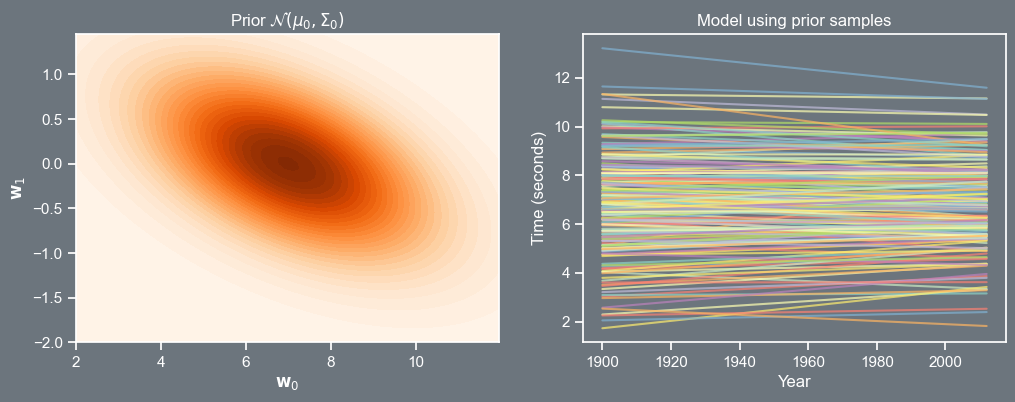

In [12]:
fig, ax = plt.subplots(2, figsize=(12,4))
fig.patch.set_facecolor('#6C757D')
ax[0].set_fc('#6C757D')
plt.subplot(121)
plt.contourf(ww1, ww2, prior.pdf(pos), 30, cmap=plt.cm.Oranges)
plt.title(r'Prior $\mathcal{N}(\mu_0, \Sigma_0)$')
plt.xlabel(r'$\mathbf{w}_0$')
plt.ylabel(r'$\mathbf{w}_1$')
fig.patch.set_facecolor('#6C757D')

plt.subplot(122)
plt.rcParams['axes.facecolor']='#6C757D'
ax[1].set_facecolor('#6C757D')
random_samples = 200
plt.plot(xi, Xg @ prior.rvs(random_samples).T, alpha=0.7)
plt.xlabel('Year')
plt.title('Model using prior samples')
plt.ylabel('Time (seconds)')
plt.savefig('prior.png', dpi=150, bbox_inches='tight', facecolor="#6C757D")
plt.show()

/var/folders/34/0177579s72zfk8k1ytk34_9c0346k7/T/ipykernel_30519/1719284279.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


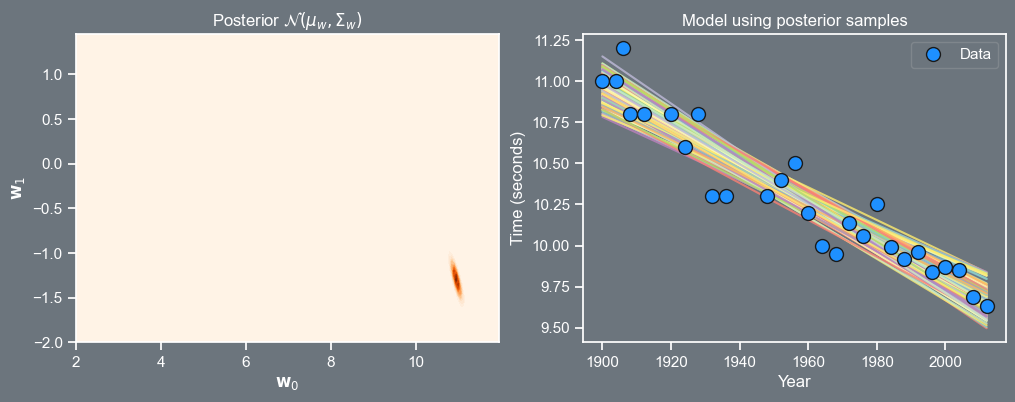

In [13]:
fig, ax = plt.subplots(2, figsize=(12,4))
fig.patch.set_facecolor('#6C757D')
ax[0].set_fc('#6C757D')
plt.subplot(121)
plt.contourf(ww1, ww2, posterior.pdf(pos), 30, cmap=plt.cm.Oranges)
plt.title(r'Posterior $\mathcal{N}(\mu_w, \Sigma_w)$')
plt.xlabel(r'$\mathbf{w}_0$')
plt.ylabel(r'$\mathbf{w}_1$')
fig.patch.set_facecolor('#6C757D')

plt.subplot(122)
plt.rcParams['axes.facecolor']='#6C757D'
ax[1].set_facecolor('#6C757D')
plt.plot(xi, Xg @ posterior.rvs(random_samples).T, zorder=-1, alpha=0.8)
a, = plt.plot(df['Year'].values, df['Time'].values, 'o', color='dodgerblue', \
              label='Data', markeredgecolor='k', lw=1, ms=10, zorder=1)
plt.xlabel('Year')
plt.title('Model using posterior samples')
plt.legend([a ], ['Data'], framealpha=0.2)
plt.ylabel('Time (seconds)')
plt.savefig('posterior.png', dpi=150, bbox_inches='tight', facecolor="#6C757D")
plt.show()

In [6]:
marginal_like_val = np.ones((ww1.shape[0], ww1.shape[1]))

for i in range(0, ww1.shape[0]):
    for j in range(0, ww1.shape[1]):
        mu_0 = np.array([ ww1[i,j], ww2[i,j] ]).reshape(2, 1)
        marginal_likelihood_dist = multivariate_normal( (X @ mu_0).flatten(), \
                                               sigma_hat**2 * np.eye(t.shape[0]) + X @ X.T)
        marginal_like_val[i, j] = marginal_likelihood_dist.pdf(t.flatten())

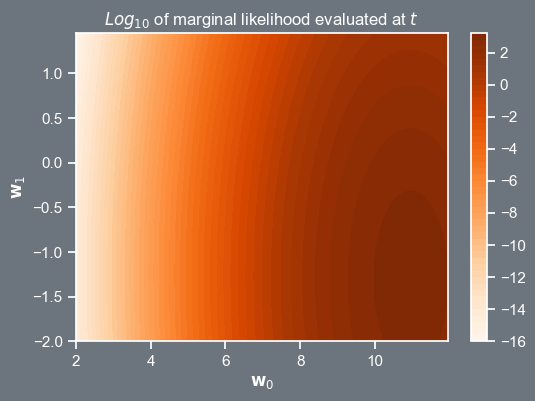

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
fig.patch.set_facecolor('#6C757D')
ax.set_fc('#6C757D')
c = plt.contourf(ww1, ww2, np.log10(marginal_like_val), 60, cmap=plt.cm.Oranges)
plt.colorbar(c)
plt.title(r'$Log_{10}$ of marginal likelihood evaluated at $t$')
plt.xlabel(r'$\mathbf{w}_0$')
plt.ylabel(r'$\mathbf{w}_1$')
plt.savefig('marginal_log.png', dpi=150, bbox_inches='tight', facecolor="#6C757D")
plt.show()

$$
p\left(t|w\right)=\mathcal{N}\left(\alpha^{2}+\beta\right)\times\int f\left(x\right)dx
$$